In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

df = pd.read_csv('tlv_data.csv')
df = df[df.notna()['brand_id']]  # remove the brand_id bug
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_26696\3027759874.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tlv_data.csv')


This notebook is made to analyze the data acquired by the scrapper. first, let's see what the data contains.
It should be a list of scooters, with time marks. The usage I had in mind is scanning the city every 15 minutes, so we will go by that.

In [22]:
df.head()

id   latitude  longitude   code  \
32134  440eb882-b89a-4bcb-8cac-8ccff2b8d0ab  32.092121  34.771114  VQY••   
32135  339df591-b7ec-49ed-8ad7-8b385b864609  32.092116  34.771117  S94••   
32136  a7b8224f-07d5-42aa-b8d8-c940cb96d0f9  32.092697  34.774189  CBE••   
32137  6ee958f2-02c1-41ae-aa38-c352c18607f0  32.092678  34.774219  S45••   
32138  41888e35-4199-4176-854d-76cc2169e775  32.092640  34.774254  J4S••   

      model                              brand_id vehicle_class  captive  \
32134    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
32135    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
32136    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
32137    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
32138    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   

                                 partner_id  battery_level  estimated_range  \
32134  e463240e-e57b-4ae7-af16-5ec53671def5             56            18914   
32135  e463240e-e57b-4ae7-af16-5ec53671def5             90            30494   
32136  e463240e-e57b-4ae7-af16-5ec53671def5             33            11194   
32137  e463240e-e57b-4ae7-af16-5ec53671def5             45            15440   
32138  e463240e-e57b-4ae7-af16-5ec53671def5             64            21616   

                               area_key  has_helmet bounty_id  \
32134  D413B31A05E46079163777CB517A6DF3       False       NaN   
32135  D413B31A05E46079163777CB517A6DF3       False       NaN   
32136  D413B31A05E46079163777CB517A6DF3       False       NaN   
32137  D413B31A05E46079163777CB517A6DF3       False       NaN   
32138  D413B31A05E46079163777CB517A6DF3       False       NaN   

                            time nest_id            time_bin  
32134 2024-07-20 02:10:27.228180     NaN 2024-07-20 02:00:00  
32135 2024-07-20 02:10:27.228180     NaN 2024-07-20 02:00:00  
32136 2024-07-20 02:10:27.228180     NaN 2024-07-20 02:00:00  
32137 2024-07-20 02:10:27.228180     NaN 2024-07-20 02:00:00  
32138 2024-07-20 02:10:27.228180     NaN 2024-07-20 02:00:00

In [31]:
print(f"number of different scooters in dataset: {len(df['code'].unique())}")

number of different scooters in dataset: 2099


Since The data contain only information on scooters that are not being used. For example, let's follow one scooter and see it leave and enter the dataset every few hours. Every time it returns to the dataset it's id has changed and it has less battery.

In [45]:
df[df['code'] == df.iloc[6]['code']]

id   latitude  longitude   code  \
32140   beb7fa1a-2f31-450d-bf88-b3299a301893  32.092606  34.774216  H6P••   
33641   beb7fa1a-2f31-450d-bf88-b3299a301893  32.092617  34.774220  H6P••   
35128   beb7fa1a-2f31-450d-bf88-b3299a301893  32.092655  34.774246  H6P••   
36606   beb7fa1a-2f31-450d-bf88-b3299a301893  32.092667  34.774250  H6P••   
38061   beb7fa1a-2f31-450d-bf88-b3299a301893  32.092648  34.774231  H6P••   
...                                      ...        ...        ...    ...   
155373  beb7fa1a-2f31-450d-bf88-b3299a301893  32.092140  34.771107  H6P••   
156712  beb7fa1a-2f31-450d-bf88-b3299a301893  32.092140  34.771103  H6P••   
158044  beb7fa1a-2f31-450d-bf88-b3299a301893  32.092140  34.771099  H6P••   
159397  beb7fa1a-2f31-450d-bf88-b3299a301893  32.092155  34.771095  H6P••   
160741  beb7fa1a-2f31-450d-bf88-b3299a301893  32.092167  34.771091  H6P••   

       model                              brand_id vehicle_class  captive  \
32140     b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
33641     b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
35128     b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
36606     b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
38061     b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
...      ...                                   ...           ...      ...   
155373    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
156712    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
158044    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
159397    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
160741    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   

                                  partner_id  battery_level  estimated_range  \
32140   e463240e-e57b-4ae7-af16-5ec53671def5             73            24704   
33641   e463240e-e57b-4ae7-af16-5ec53671def5             73            24704   
35128   e463240e-e57b-4ae7-af16-5ec53671def5             73            24704   
36606   e463240e-e57b-4ae7-af16-5ec53671def5             73            24704   
38061   e463240e-e57b-4ae7-af16-5ec53671def5             73            24704   
...                                      ...            ...              ...   
155373  e463240e-e57b-4ae7-af16-5ec53671def5             70            23932   
156712  e463240e-e57b-4ae7-af16-5ec53671def5             70            23932   
158044  e463240e-e57b-4ae7-af16-5ec53671def5             70            23932   
159397  e463240e-e57b-4ae7-af16-5ec53671def5             70            23932   
160741  e463240e-e57b-4ae7-af16-5ec53671def5             70            23932   

                                area_key  has_helmet bounty_id  \
32140   D413B31A05E46079163777CB517A6DF3       False       NaN   
33641   D413B31A05E46079163777CB517A6DF3       False       NaN   
35128   D413B31A05E46079163777CB517A6DF3       False       NaN   
36606   D413B31A05E46079163777CB517A6DF3       False       NaN   
38061   D413B31A05E46079163777CB517A6DF3       False       NaN   
...                                  ...         ...       ...   
155373  D413B31A05E46079163777CB517A6DF3       False       NaN   
156712  D413B31A05E46079163777CB517A6DF3       False       NaN   
158044  D413B31A05E46079163777CB517A6DF3       False       NaN   
159397  D413B31A05E46079163777CB517A6DF3       False       NaN   
160741  D413B31A05E46079163777CB517A6DF3       False       NaN   

                             time nest_id            time_bin  
32140  2024-07-20 02:10:27.228180     NaN 2024-07-20 02:00:00  
33641  2024-07-20 02:25:30.594510     NaN 2024-07-20 02:15:00  
35128  2024-07-20 02:40:27.806395     NaN 2024-07-20 02:30:00  
36606  2024-07-20 02:55:24.917853     NaN 2024-07-20 02:45:00  
38061  2024-07-20 03:10:25.723256     NaN 2024-07-20 03:00:00  
...                           ...     ...             

Text(0.5, 0, 'Hour')

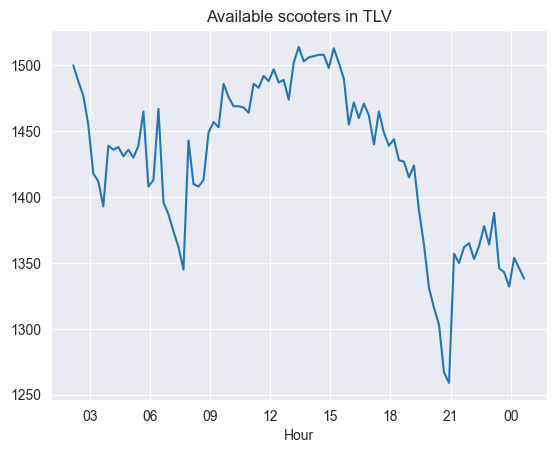

In [35]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

available = [len(df[df['time'] == time]) for time in df['time'].unique()]

fig, ax = plt.subplots()
plt.plot(df['time'].unique() , available)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

plt.title("Available scooters in TLV")
plt.xlabel("Hour")

np.float64(58.35066666666667)

Text(0.5, 0, 'Hour')

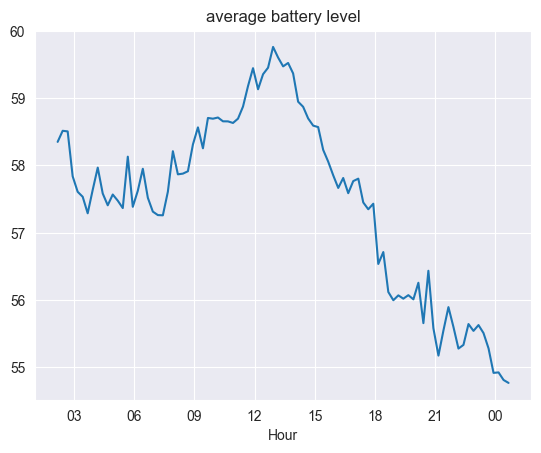

In [42]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np


average_battery = [np.mean(df[df['time'] == time]['battery_level']) 
                   for time in df['time'].unique()]

fig, ax = plt.subplots()
plt.plot(df['time'].unique() , average_battery)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

plt.title("average battery level")
plt.xlabel("Hour")

In [55]:
from datetime import datetime
df_late = df[df['time'] == df.iloc[-1]['time']]
df_late

id   latitude  longitude   code  \
160737  de479c13-d143-4851-a55b-c40f4a2ad47c  32.092788  34.770534  JYC••   
160738  62763d81-8c95-4652-bdd4-21881b15543f  32.091718  34.770733  WB3••   
160739  8c6ca779-6419-4c63-9823-a552e2fc8237  32.093106  34.771166  PBQ••   
160740  99f8d191-4955-414f-98e4-4a50b42b25b5  32.092239  34.771098  VHV••   
160741  beb7fa1a-2f31-450d-bf88-b3299a301893  32.092167  34.771091  H6P••   
...                                      ...        ...        ...    ...   
162070  473fc69b-add6-4e38-89d3-de6b0eb0bce6  32.054520  34.795582  P5I••   
162071  bd387cbd-4751-4aed-a20a-93523b43b187  32.053368  34.804070  U7E••   
162072  e4b7ab87-1c5e-48b4-ac77-904a38bcbdd3  32.053862  34.806608  PSL••   
162073  884d792b-d210-4424-807f-5b4e2e748e5c  32.052799  34.802399  M92••   
162074  1c66493b-e66f-445b-b736-b5bfd3a245a9  32.055435  34.809139  E8P••   

       model                              brand_id vehicle_class  captive  \
160737    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
160738    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
160739    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
160740    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
160741    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
...      ...                                   ...           ...      ...   
162070    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
162071    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
162072    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
162073    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
162074    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   

                                  partner_id  battery_level  estimated_range  \
160737  e463240e-e57b-4ae7-af16-5ec53671def5             18             6176   
160738  e463240e-e57b-4ae7-af16-5ec53671def5             14             4632   
160739  e463240e-e57b-4ae7-af16-5ec53671def5             36            12352   
160740  e463240e-e57b-4ae7-af16-5ec53671def5             93            31652   
160741  e463240e-e57b-4ae7-af16-5ec53671def5             70            23932   
...                                      ...            ...              ...   
162070  e463240e-e57b-4ae7-af16-5ec53671def5             76            25862   
162071  e463240e-e57b-4ae7-af16-5ec53671def5             55            18528   
162072  e463240e-e57b-4ae7-af16-5ec53671def5             78            26634   
162073  e463240e-e57b-4ae7-af16-5ec53671def5             20             6948   
162074  e463240e-e57b-4ae7-af16-5ec53671def5             28             9650   

                                area_key  has_helmet  \
160737  D413B31A05E46079163777CB517A6DF3       False   
160738  D413B31A05E46079163777CB517A6DF3       False   
160739  D413B31A05E46079163777CB517A6DF3       False   
160740  D413B31A05E46079163777CB517A6DF3        True   
160741  D413B31A05E46079163777CB517A6DF3       False   
...                                  ...         ...   
162070  D413B31A05E46079163777CB517A6DF3       False   
162071  D413B31A05E46079163777CB517A6DF3       False   
162072  D413B31A05E46079163777CB517A6DF3       False   
162073  D413B31A05E46079163777CB517A6DF3       False   
162074  D413B31A05E46079163777CB517A6DF3       False   

                                   bounty_id                        time  \
160737                                   NaN  2024-07-21 00:40:26.740922   
160738  9a428751-2835-417e-8fd8-5cc5a0384fc1  2024-07-21 00:40:26.740922   
160739                                   NaN  2024-07-21 00:40:26.740922   
160740                                   NaN  2024-07-21 00:40:26.740922   
160741                                   NaN  2024-07-21 00:40:26.740922   
...                                      ...                         ...   
162070  678b6c07-1edd-47e8

In [17]:
import folium
from folium.plugins import HeatMap

# Create a map centered around Tel Aviv
map_tlv = folium.Map(location=[32.073195, 34.790387], zoom_start=14)

df_early = df[df['time'] == df.iloc[0]['time']]
df_late = df[df['time'] == df.iloc[-1]['time']]

# Prepare data for the heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in df_late.iterrows()]

# Add heatmap layer to the map
HeatMap(heat_data).add_to(map_tlv)

# Save the map as an HTML file
map_tlv.save('tel_aviv_scooter_heatmap.html')

# Display the map
map_tlv

In [56]:
from folium.plugins import HeatMapWithTime

df['timestamp'] = pd.to_datetime(df['time'])

# Prepare data for the heatmap
heat_data = []
for timestamp in df['timestamp'].sort_values().unique():
    data_at_time = df[df['timestamp'] == timestamp]
    heat_data.append([[row['latitude'], row['longitude']] for index, row in data_at_time.iterrows()])

# Create a map centered around Tel Aviv
map_tlv = folium.Map(location=[32.073195, 34.790387], zoom_start=14)

# Add time slider heatmap
HeatMapWithTime(heat_data, index=[timestamp.strftime('%Y-%m-%d %H:%M:%S') for timestamp in df['timestamp'].sort_values().unique()]).add_to(map_tlv)

# Save the map as an HTML file
map_tlv.save('tel_aviv_scooter_heatmap_animation.html')

# Display the map
map_tlv

In [61]:
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Sort the dataframe by time
df = df.sort_values(by='time')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the area boundaries (example coordinates)
min_lat, max_lat = df['latitude'].min(), df['latitude'].max()
min_lon, max_lon = df['longitude'].min(), df['longitude'].max()

# Define grid size
lat_bins = np.linspace(min_lat, max_lat, 20)
lon_bins = np.linspace(min_lon, max_lon, 20)

# Group by time (you can group by hour, minute, etc. depending on your requirement)
df['time_bin'] = df['time'].dt.floor('15min')

# Create heatmaps for each time bin
heatmaps = []
unique_times = df['time_bin'].unique()

for time in unique_times:
    subset = df[df['time_bin'] == time]
    heatmap, xedges, yedges = np.histogram2d(subset['latitude'], subset['longitude'], bins=[lat_bins, lon_bins])
    heatmaps.append(heatmap)

# Normalize heatmaps for consistent coloring
max_heat = max([np.max(hm) for hm in heatmaps])
heatmaps = [hm / max_heat for hm in heatmaps]

# Save heatmaps as images
heatmap_images = []
for i, heatmap in enumerate(heatmaps):
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap, xticklabels=False, yticklabels=False, cmap='viridis')
    plt.title(f'Heatmap for {unique_times[i]}')
    plt.savefig(f'heatmaps/heatmap_{i}.png')
    plt.close()
    heatmap_images.append(f'heatmap_{i}.png')


In [66]:
subset

id   latitude  longitude   code  \
38990  f28773e4-9ebb-4666-81ab-2295ec05f09c  32.067098  34.800444  QRW••   
38999  839aa975-261b-4e8d-961c-f191bf4c4703  32.067906  34.802549  WP6••   
39240  07aa1bb3-55af-4f65-8877-1a039ec395cc  32.057783  34.783295  8P8••   
38997  c5febdd3-4be9-4f3e-b3b0-60c5a3f55348  32.063779  34.794459  TYV••   
38763  cf9bf350-82dc-4944-aef4-5d60646c10c0  32.070896  34.794010  SFE••   
...                                     ...        ...        ...    ...   
38674  1f2cb98e-57e0-4ce6-a445-60ed7091325a  32.071869  34.775249  YVS••   
38761  98dd3ccd-5312-4a50-99ec-facb4ab0b28c  32.070950  34.794235  38G••   
38526  6134dc31-b947-4c86-b90c-cd631fbdfcb5  32.076111  34.774517  PBQ••   
38527  06cb70f7-654d-46d2-8682-bd10f13789ff  32.080166  34.782543  LYU••   
38520  5ef9b864-c6b7-46aa-b3aa-dc5839a8713d  32.080252  34.779116  9DS••   

      model                              brand_id vehicle_class  captive  \
38990    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
38999    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
39240    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
38997    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
38763    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
...     ...                                   ...           ...      ...   
38674    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
38761    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
38526    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
38527    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
38520    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   

                                 partner_id  battery_level  estimated_range  \
38990  e463240e-e57b-4ae7-af16-5ec53671def5             13             4246   
38999  e463240e-e57b-4ae7-af16-5ec53671def5             51            17370   
39240  e463240e-e57b-4ae7-af16-5ec53671def5             17             5790   
38997  e463240e-e57b-4ae7-af16-5ec53671def5             19             6562   
38763  e463240e-e57b-4ae7-af16-5ec53671def5             92            31266   
...                                     ...            ...              ...   
38674  e463240e-e57b-4ae7-af16-5ec53671def5             57            19300   
38761  e463240e-e57b-4ae7-af16-5ec53671def5             68            23160   
38526  e463240e-e57b-4ae7-af16-5ec53671def5             65            22002   
38527  e463240e-e57b-4ae7-af16-5ec53671def5             23             7720   
38520  e463240e-e57b-4ae7-af16-5ec53671def5             36            12352   

                               area_key  has_helmet  \
38990  D413B31A05E46079163777CB517A6DF3       False   
38999  D413B31A05E46079163777CB517A6DF3       False   
39240  D413B31A05E46079163777CB517A6DF3       False   
38997  D413B31A05E46079163777CB517A6DF3       False   
38763  D413B31A05E46079163777CB517A6DF3       False   
...                                 ...         ...   
38674  D413B31A05E46079163777CB517A6DF3       False   
38761  D413B31A05E46079163777CB517A6DF3        True   
38526  D413B31A05E46079163777CB517A6DF3       False   
38527  D413B31A05E46079163777CB517A6DF3        True   
38520  D413B31A05E46079163777CB517A6DF3       False   

                                  bounty_id                       time  \
38990  925599ce-6374-4144-adbd-9b074ee84fd3 2024-07-20 03:10:25.723256   
38999                                   NaN 2024-07-20 03:10:25.723256   
39240  b9306a96-5c0b-4032-8e6a-34591e18200e 2024-07-20 03:10:25.723256   
38997                                   NaN 2024-07-20 03:10:25.723256   
38763                                   NaN 2024-07-20 03:10:25.723256   
...                                     ...                        ...   
38674                                   NaN 2024-07-20 03:10:25.723256   
38761        

In [87]:
import plotly.express as px

time = unique_times[70]
subset = df[df['time_bin'] == time]

fig = px.density_mapbox(subset, lat='latitude', lon='longitude', radius=15,
                        center=dict(lat=32.0753, lon=34.7818), zoom=12,
                        mapbox_style="open-street-map", range_color=(0, 20))
fig.update_layout(title=f'Density Map for {time}',
                  margin=dict(l=0, r=0, t=0, b=0),  # Remove white borders
                  coloraxis_colorbar=dict(
                      x=0.9,  # Adjust x position of colorbar
                      y=0.5,  # Adjust y position of colorbar
                      lenmode="fraction",
                      len=0.75,
                      thicknessmode="pixels",
                      thickness=20,
                      tickfont=dict(color='black'),  # Color of the colorbar tick font
                      )
                  ),

fig.add_annotation(
    text=f"{time.strftime('%A: %Y-%m-%d %H:%M')}",
    xref="paper", yref="paper",
    x=0.04, y=0.85,
    showarrow=False,
    font=dict(size=18, color="black"),
    bgcolor="white",
    bordercolor="black",
    borderwidth=1
)

fig.add_annotation(
    text="Birds in Tel Aviv",
    xref="paper", yref="paper",
    x=0.04, y=0.95,  # Adjust as needed
    showarrow=False,
    font=dict(size=24, color="black"),
)

fig.add_annotation(
    text="@Shohamjac",
    xref="paper", yref="paper",
    x=0.94, y=0.01,  # Adjust as needed
    showarrow=False,
    font=dict(size=18, color="black"),
)


fig.show()

# Combining it all into a video

In [92]:
import plotly.express as px
import cv2
from datetime import datetime

MAX_HEAT = 20

df['time'] = pd.to_datetime(df['time'])
df['time_bin'] = df['time'].dt.floor('15min')
df = df[df['time_bin'] >= datetime(2024, 7, 20, 2, 00)]

density_map_images = []
unique_times = df['time_bin'].unique()
for i, time in enumerate(unique_times):
    subset = df[df['time_bin'] == time]
        
    fig = px.density_mapbox(subset, lat='latitude', lon='longitude', radius=15,
                        center=dict(lat=32.0753, lon=34.7818), zoom=12,
                        mapbox_style="open-street-map", range_color=(0, MAX_HEAT))
    # fig.update_layout(title=f'Density Map for {time}')
    fig.update_layout(title=f'Density Map for {time}',
                  margin=dict(l=0, r=0, t=0, b=0),  # Remove white borders
                  coloraxis_colorbar=dict(
                      x=0.9,  # Adjust x position of colorbar
                      y=0.5,  # Adjust y position of colorbar
                      lenmode="fraction",
                      len=0.75,
                      thicknessmode="pixels",
                      thickness=20,
                      tickfont=dict(color='black'),  # Color of the colorbar tick font
                      )
                  ),

    fig.add_annotation(
        text=f"{time.strftime('%A: %Y-%m-%d %H:%M')}",
        xref="paper", yref="paper",
        x=0.03, y=0.85,
        showarrow=False,
        font=dict(size=18, color="black"),
        bgcolor="white",
        bordercolor="black",
        borderwidth=1
    )
    
    fig.add_annotation(
        text="Birds (E-scooters) in Tel Aviv",
        xref="paper", yref="paper",
        x=0.03, y=0.95,  # Adjust as needed
        showarrow=False,
        font=dict(size=24, color="black"),
    )
    
    fig.add_annotation(
        text="@Shohamjac",
        xref="paper", yref="paper",
        x=0.01, y=0.01,  # Adjust as needed
        showarrow=False,
        font=dict(size=18, color="black"),
    )
    
    image_path = f'maps/density_map_{i}.png'
    fig.write_image(image_path, scale=2)
    density_map_images.append(image_path)

In [93]:

# Define video properties
frame_width = 1400
frame_height = 1000
fps = 8  # frames per second (for faster playback, adjust as needed)

out = cv2.VideoWriter('density_map_video.avi', cv2.VideoWriter_fourcc(*'DIVX'), fps, (frame_width, frame_height))

for img_path in density_map_images:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (frame_width, frame_height))
    out.write(img)

out.release()

In [90]:
 # 035305150
import kaleido

In [10]:
from datetime import datetime

df[df['time_bin'] >= datetime(2024, 7, 20, 2, 00)]

id   latitude  longitude   code  \
32134   440eb882-b89a-4bcb-8cac-8ccff2b8d0ab  32.092121  34.771114  VQY••   
32135   339df591-b7ec-49ed-8ad7-8b385b864609  32.092116  34.771117  S94••   
32136   a7b8224f-07d5-42aa-b8d8-c940cb96d0f9  32.092697  34.774189  CBE••   
32137   6ee958f2-02c1-41ae-aa38-c352c18607f0  32.092678  34.774219  S45••   
32138   41888e35-4199-4176-854d-76cc2169e775  32.092640  34.774254  J4S••   
...                                      ...        ...        ...    ...   
162070  473fc69b-add6-4e38-89d3-de6b0eb0bce6  32.054520  34.795582  P5I••   
162071  bd387cbd-4751-4aed-a20a-93523b43b187  32.053368  34.804070  U7E••   
162072  e4b7ab87-1c5e-48b4-ac77-904a38bcbdd3  32.053862  34.806608  PSL••   
162073  884d792b-d210-4424-807f-5b4e2e748e5c  32.052799  34.802399  M92••   
162074  1c66493b-e66f-445b-b736-b5bfd3a245a9  32.055435  34.809139  E8P••   

       model                              brand_id vehicle_class  captive  \
32134     b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
32135     b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
32136     b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
32137     b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
32138     b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
...      ...                                   ...           ...      ...   
162070    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
162071    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
162072    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
162073    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   
162074    b3  df76d602-dd1a-4ce4-a64f-2e5dd8c6f845       scooter    False   

                                  partner_id  battery_level  estimated_range  \
32134   e463240e-e57b-4ae7-af16-5ec53671def5             56            18914   
32135   e463240e-e57b-4ae7-af16-5ec53671def5             90            30494   
32136   e463240e-e57b-4ae7-af16-5ec53671def5             33            11194   
32137   e463240e-e57b-4ae7-af16-5ec53671def5             45            15440   
32138   e463240e-e57b-4ae7-af16-5ec53671def5             64            21616   
...                                      ...            ...              ...   
162070  e463240e-e57b-4ae7-af16-5ec53671def5             76            25862   
162071  e463240e-e57b-4ae7-af16-5ec53671def5             55            18528   
162072  e463240e-e57b-4ae7-af16-5ec53671def5             78            26634   
162073  e463240e-e57b-4ae7-af16-5ec53671def5             20             6948   
162074  e463240e-e57b-4ae7-af16-5ec53671def5             28             9650   

                                area_key  has_helmet  \
32134   D413B31A05E46079163777CB517A6DF3       False   
32135   D413B31A05E46079163777CB517A6DF3       False   
32136   D413B31A05E46079163777CB517A6DF3       False   
32137   D413B31A05E46079163777CB517A6DF3       False   
32138   D413B31A05E46079163777CB517A6DF3       False   
...                                  ...         ...   
162070  D413B31A05E46079163777CB517A6DF3       False   
162071  D413B31A05E46079163777CB517A6DF3       False   
162072  D413B31A05E46079163777CB517A6DF3       False   
162073  D413B31A05E46079163777CB517A6DF3       False   
162074  D413B31A05E46079163777CB517A6DF3       False   

                                   bounty_id                       time  \
32134                                    NaN 2024-07-20 02:10:27.228180   
32135                                    NaN 2024-07-20 02:10:27.228180   
32136                                    NaN 2024-07-20 02:10:27.228180   
32137                                    NaN 2024-07-20 02:10:27.228180   
32138                                    NaN 2024-07-20 02:10:27.228180   
...                                      ...                        ...   
162070  678b6c07-1edd-47e8-9478-f